In [1]:
%matplotlib inline

import matplotlib
import requests
import random
import urllib.parse
from tqdm import tqdm
from time import sleep
import pandas as pd

In [2]:
all_names = pd.read_csv("names.csv", header='infer')
all_names.head()

,id,name,frequency
0,1,"KISSINGER, HENRY A",30004
1,2,"CARTER, JIMMY",15282
2,3,"VANCE, CYRUS R",14944
3,4,"FORD, GERALD R",6235
4,5,"SADAT, ANWAR",4676


In [4]:
sorted_names = all_names.sort_values(by=['frequency'], ascending=False)
names = sorted_names.iloc[0:sorted_names[sorted_names.frequency < 51].index[0]]
names['frequency'].mean()

193.73490427098673

In [5]:
uri_prefix = "https://tools.wmflabs.org/wikidata-reconcile/?query="
matches = []

In [9]:
for i in tqdm(range(len(names))):
    n = random.uniform(0, 0.17)
    sleep(n)
    item = names.iloc[i]
    request = uri_prefix + '{"query"%3A"' + urllib.parse.quote_plus(item['name']) + '"%2C"type"%3A"Q5"}'
    response = requests.get(request).json().get('result')
    
    if response:
        match = response[0]
        matches.append([item['id'],
                        match.get('id', None), 
                        match.get('name', None), 
                        match.get('score', None)])

100%|██████████| 2037/2037 [24:49<00:00,  1.38it/s]


In [10]:
match_df = pd.DataFrame(matches, columns=['original_id', 'wiki_id', 'wiki_name', 'match_score'])

In [13]:
match_df.head()

,original_id,wiki_id,wiki_name,match_score
0,1,Q66107,Henry Kissinger,0.5
1,2,Q23685,Jimmy Carter,0.5
2,3,Q296661,Cyrus Vance,0.5
3,4,Q9582,Gerald Ford,0.5
4,5,Q42013,Anwar as-Sadat,0.5


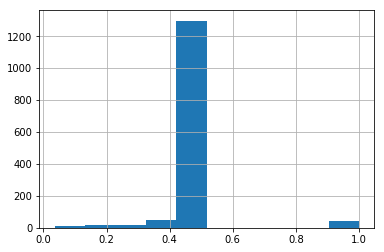

In [12]:
match_df['match_score'].hist()

In [15]:
f = open('matches.csv', mode='w')
f.write(match_df.to_csv(index=False))
f.close()

In [16]:
f = open('top_names.csv', mode='w')
f.write(names.to_csv(index=False))
f.close()